# Support Vector Machine

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
import warnings
warnings.simplefilter('ignore')

In [2]:
df =pd.read_csv("mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [6]:
cat_cols=df.select_dtypes(include=['object']).columns

In [7]:
label=LabelEncoder()

In [8]:
for col in cat_cols:
    if df[col].dtypes=='object':
        df[col]=label.fit_transform(df[col])
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,11.092703,8.423199


In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

array([[<Axes: title={'center': 'cap_shape'}>,
        <Axes: title={'center': 'cap_surface'}>,
        <Axes: title={'center': 'cap_color'}>,
        <Axes: title={'center': 'bruises'}>,
        <Axes: title={'center': 'odor'}>],
       [<Axes: title={'center': 'gill_attachment'}>,
        <Axes: title={'center': 'gill_spacing'}>,
        <Axes: title={'center': 'gill_size'}>,
        <Axes: title={'center': 'gill_color'}>,
        <Axes: title={'center': 'stalk_shape'}>],
       [<Axes: title={'center': 'stalk_root'}>,
        <Axes: title={'center': 'stalk_surface_above_ring'}>,
        <Axes: title={'center': 'stalk_surface_below_ring'}>,
        <Axes: title={'center': 'stalk_color_above_ring'}>,
        <Axes: title={'center': 'stalk_color_below_ring'}>],
       [<Axes: title={'center': 'veil_type'}>,
        <Axes: title={'center': 'veil_color'}>,
        <Axes: title={'center': 'ring_number'}>,
        <Axes: title={'center': 'ring_type'}>,
        <Axes: title={'center': 'spor

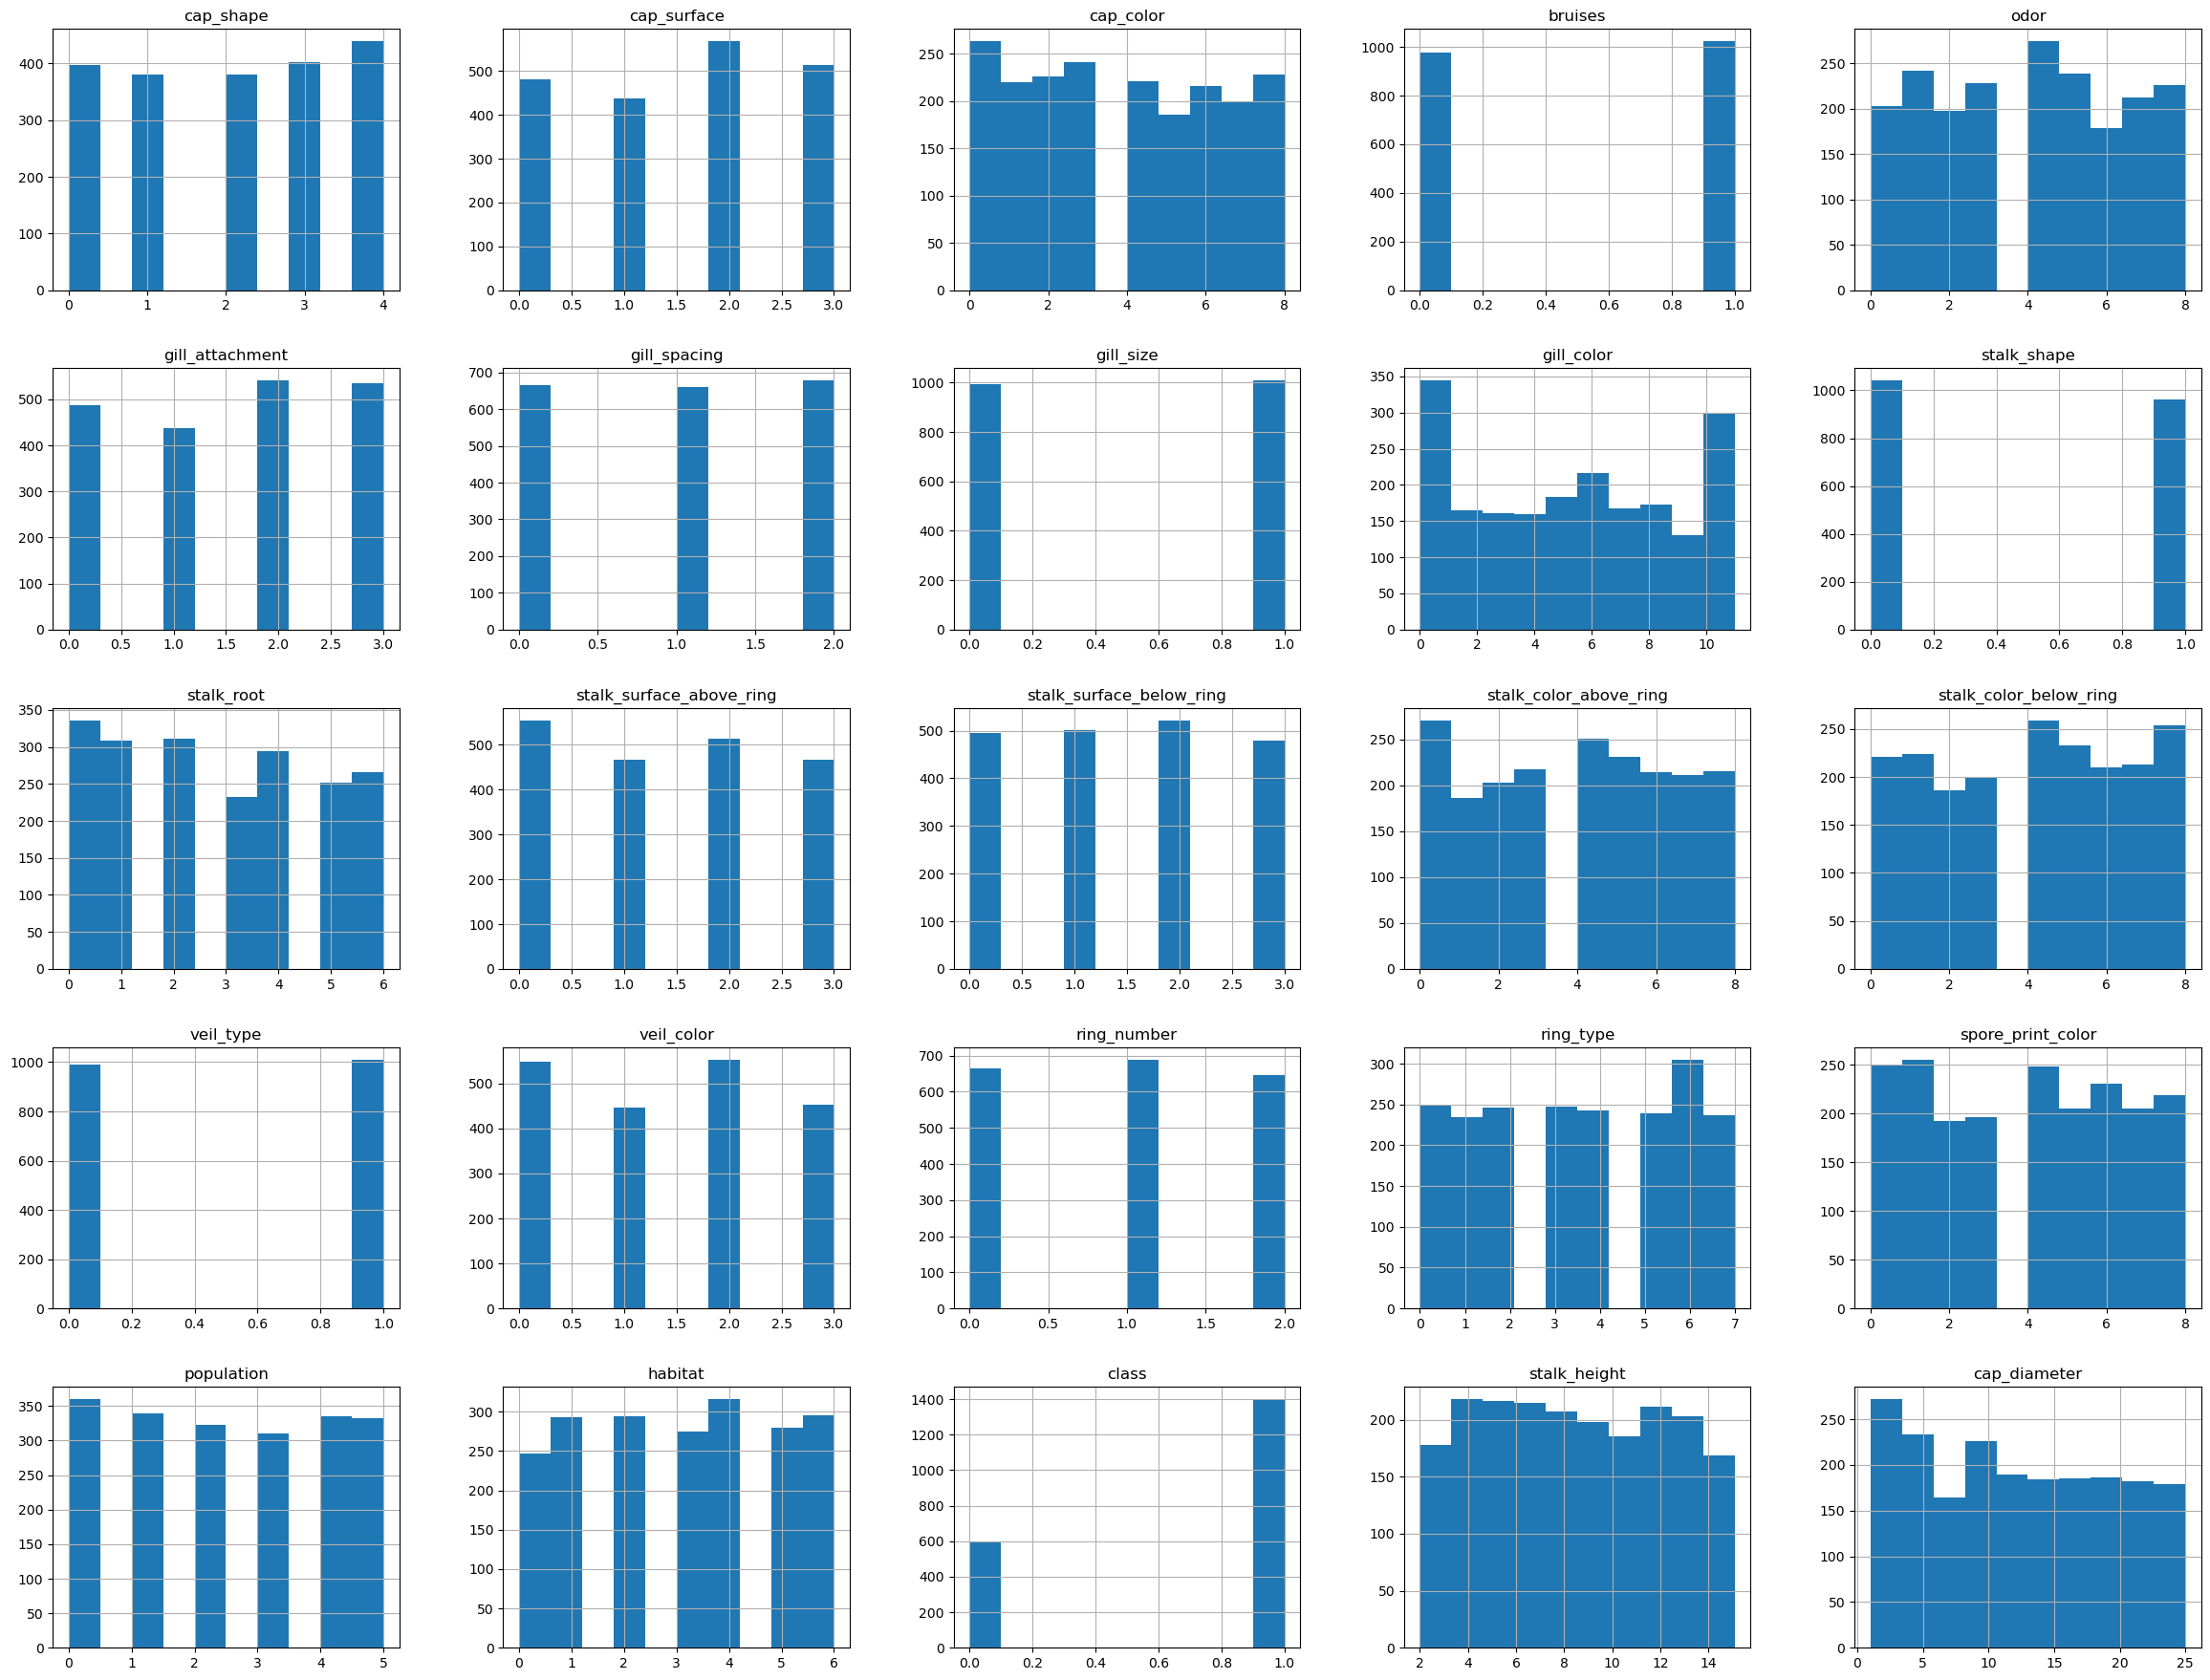

In [10]:
df.hist(figsize=(29,22))

<Axes: >

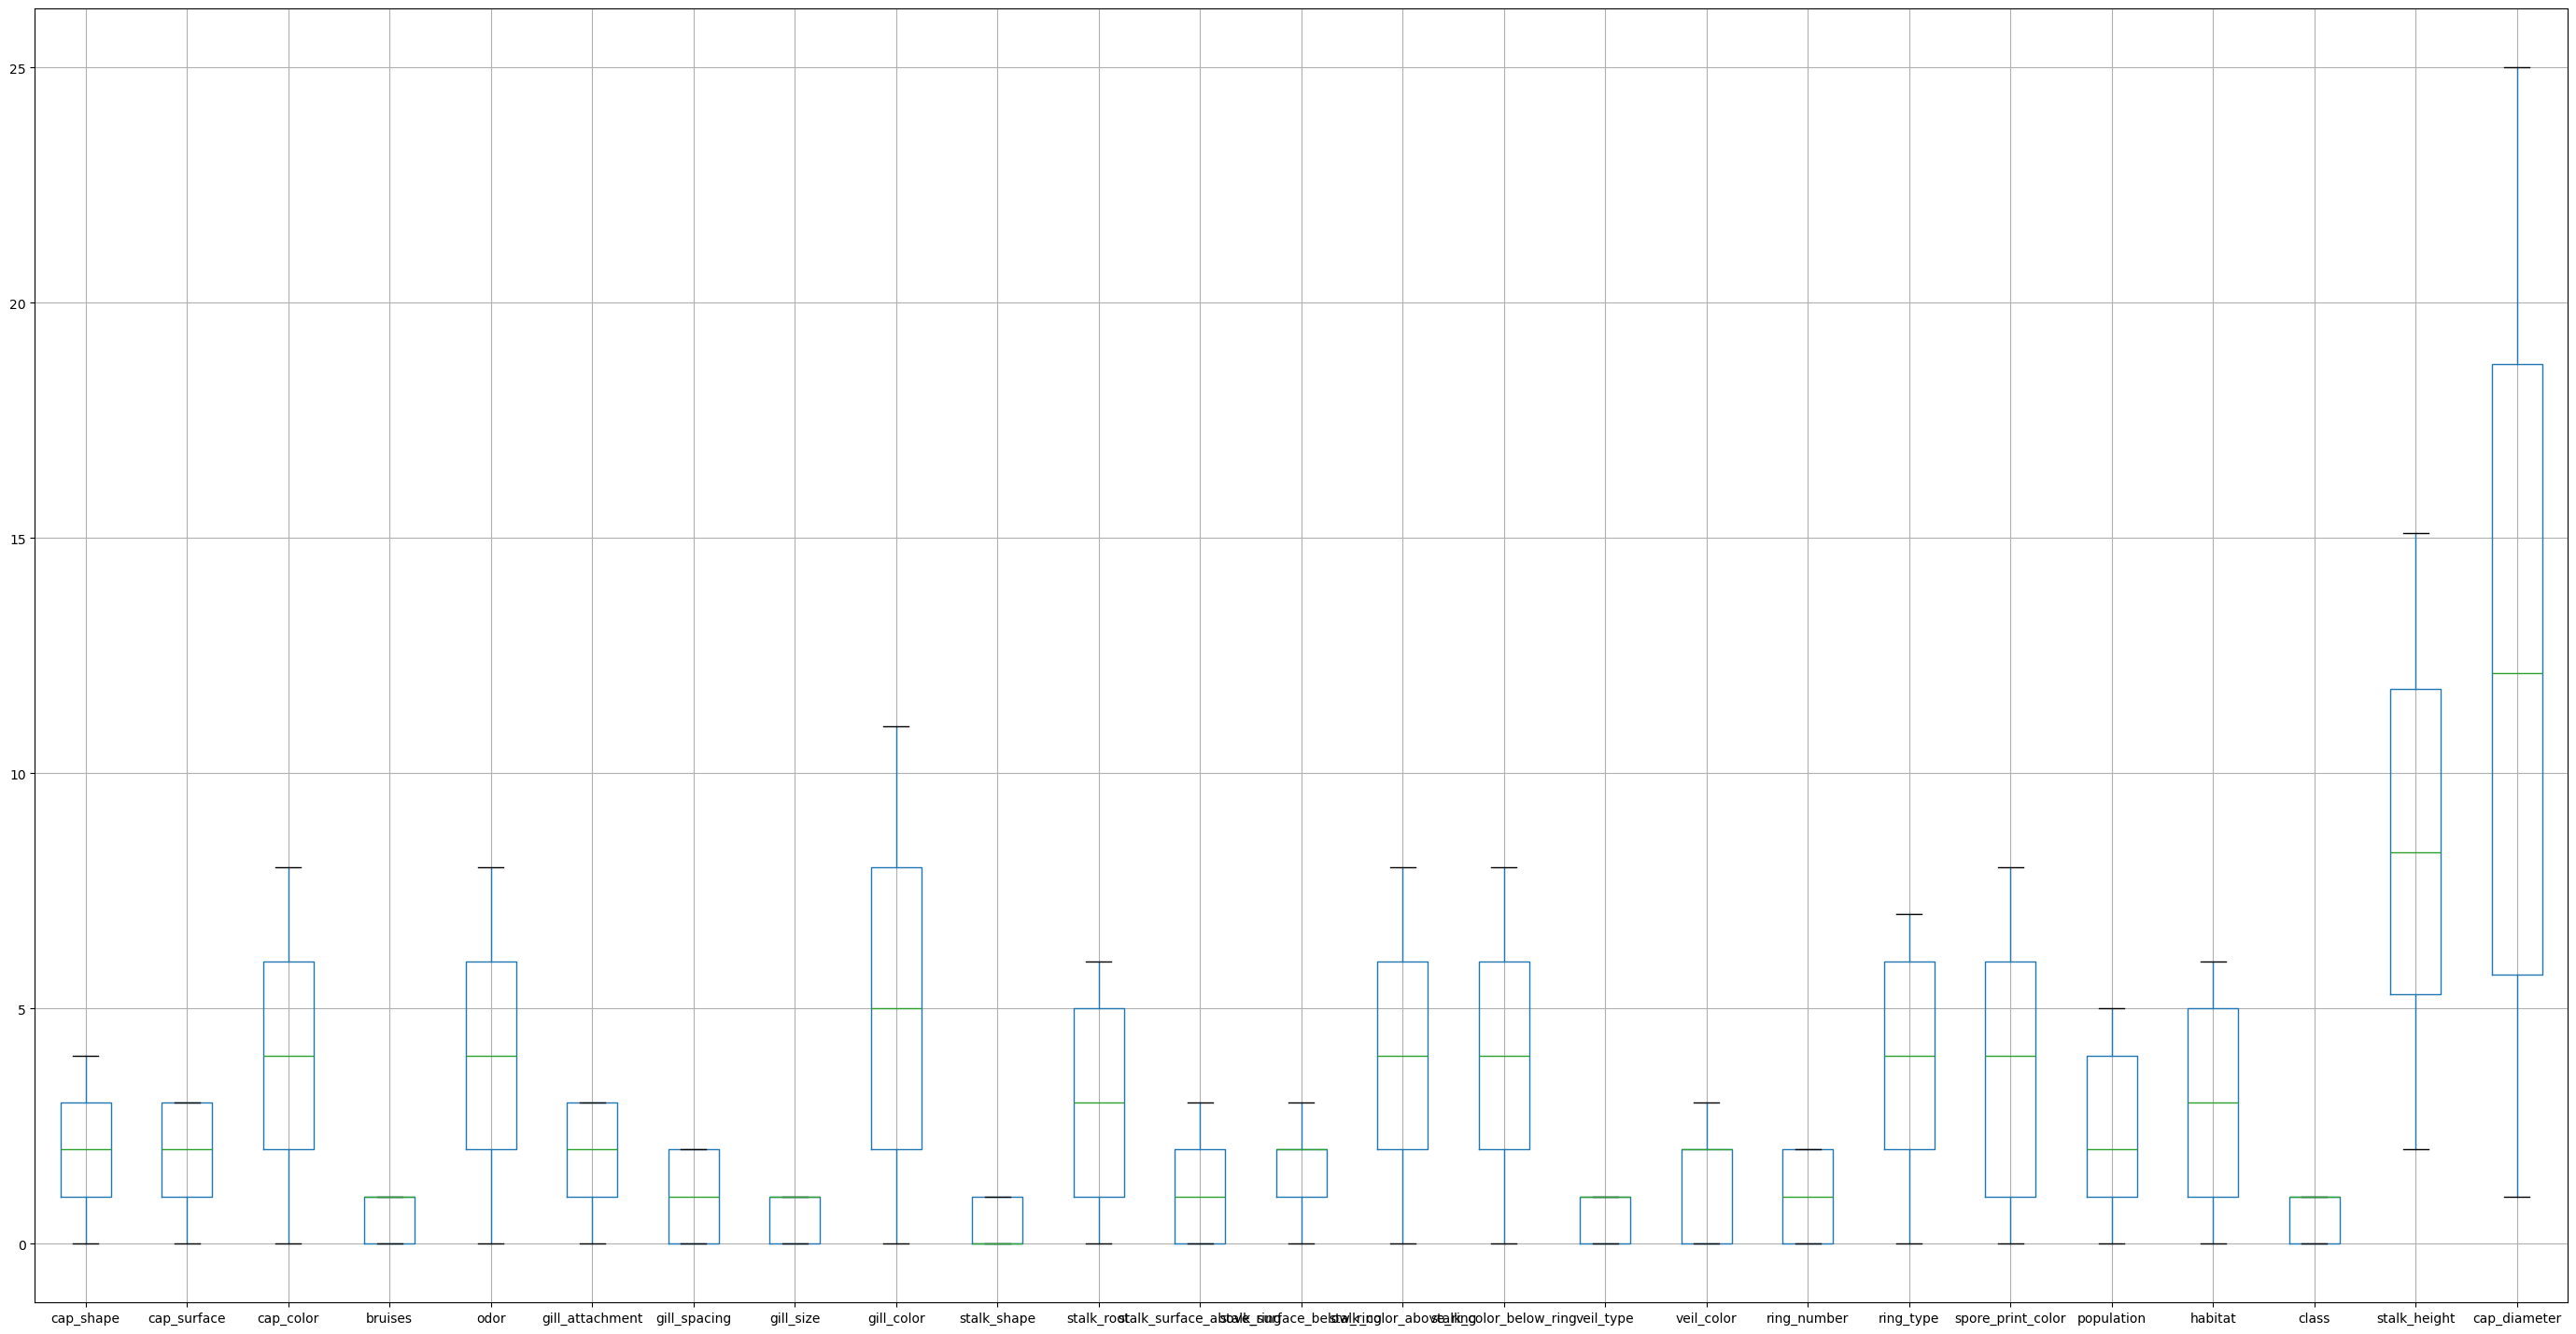

In [11]:
df.boxplot(figsize=(35,18))

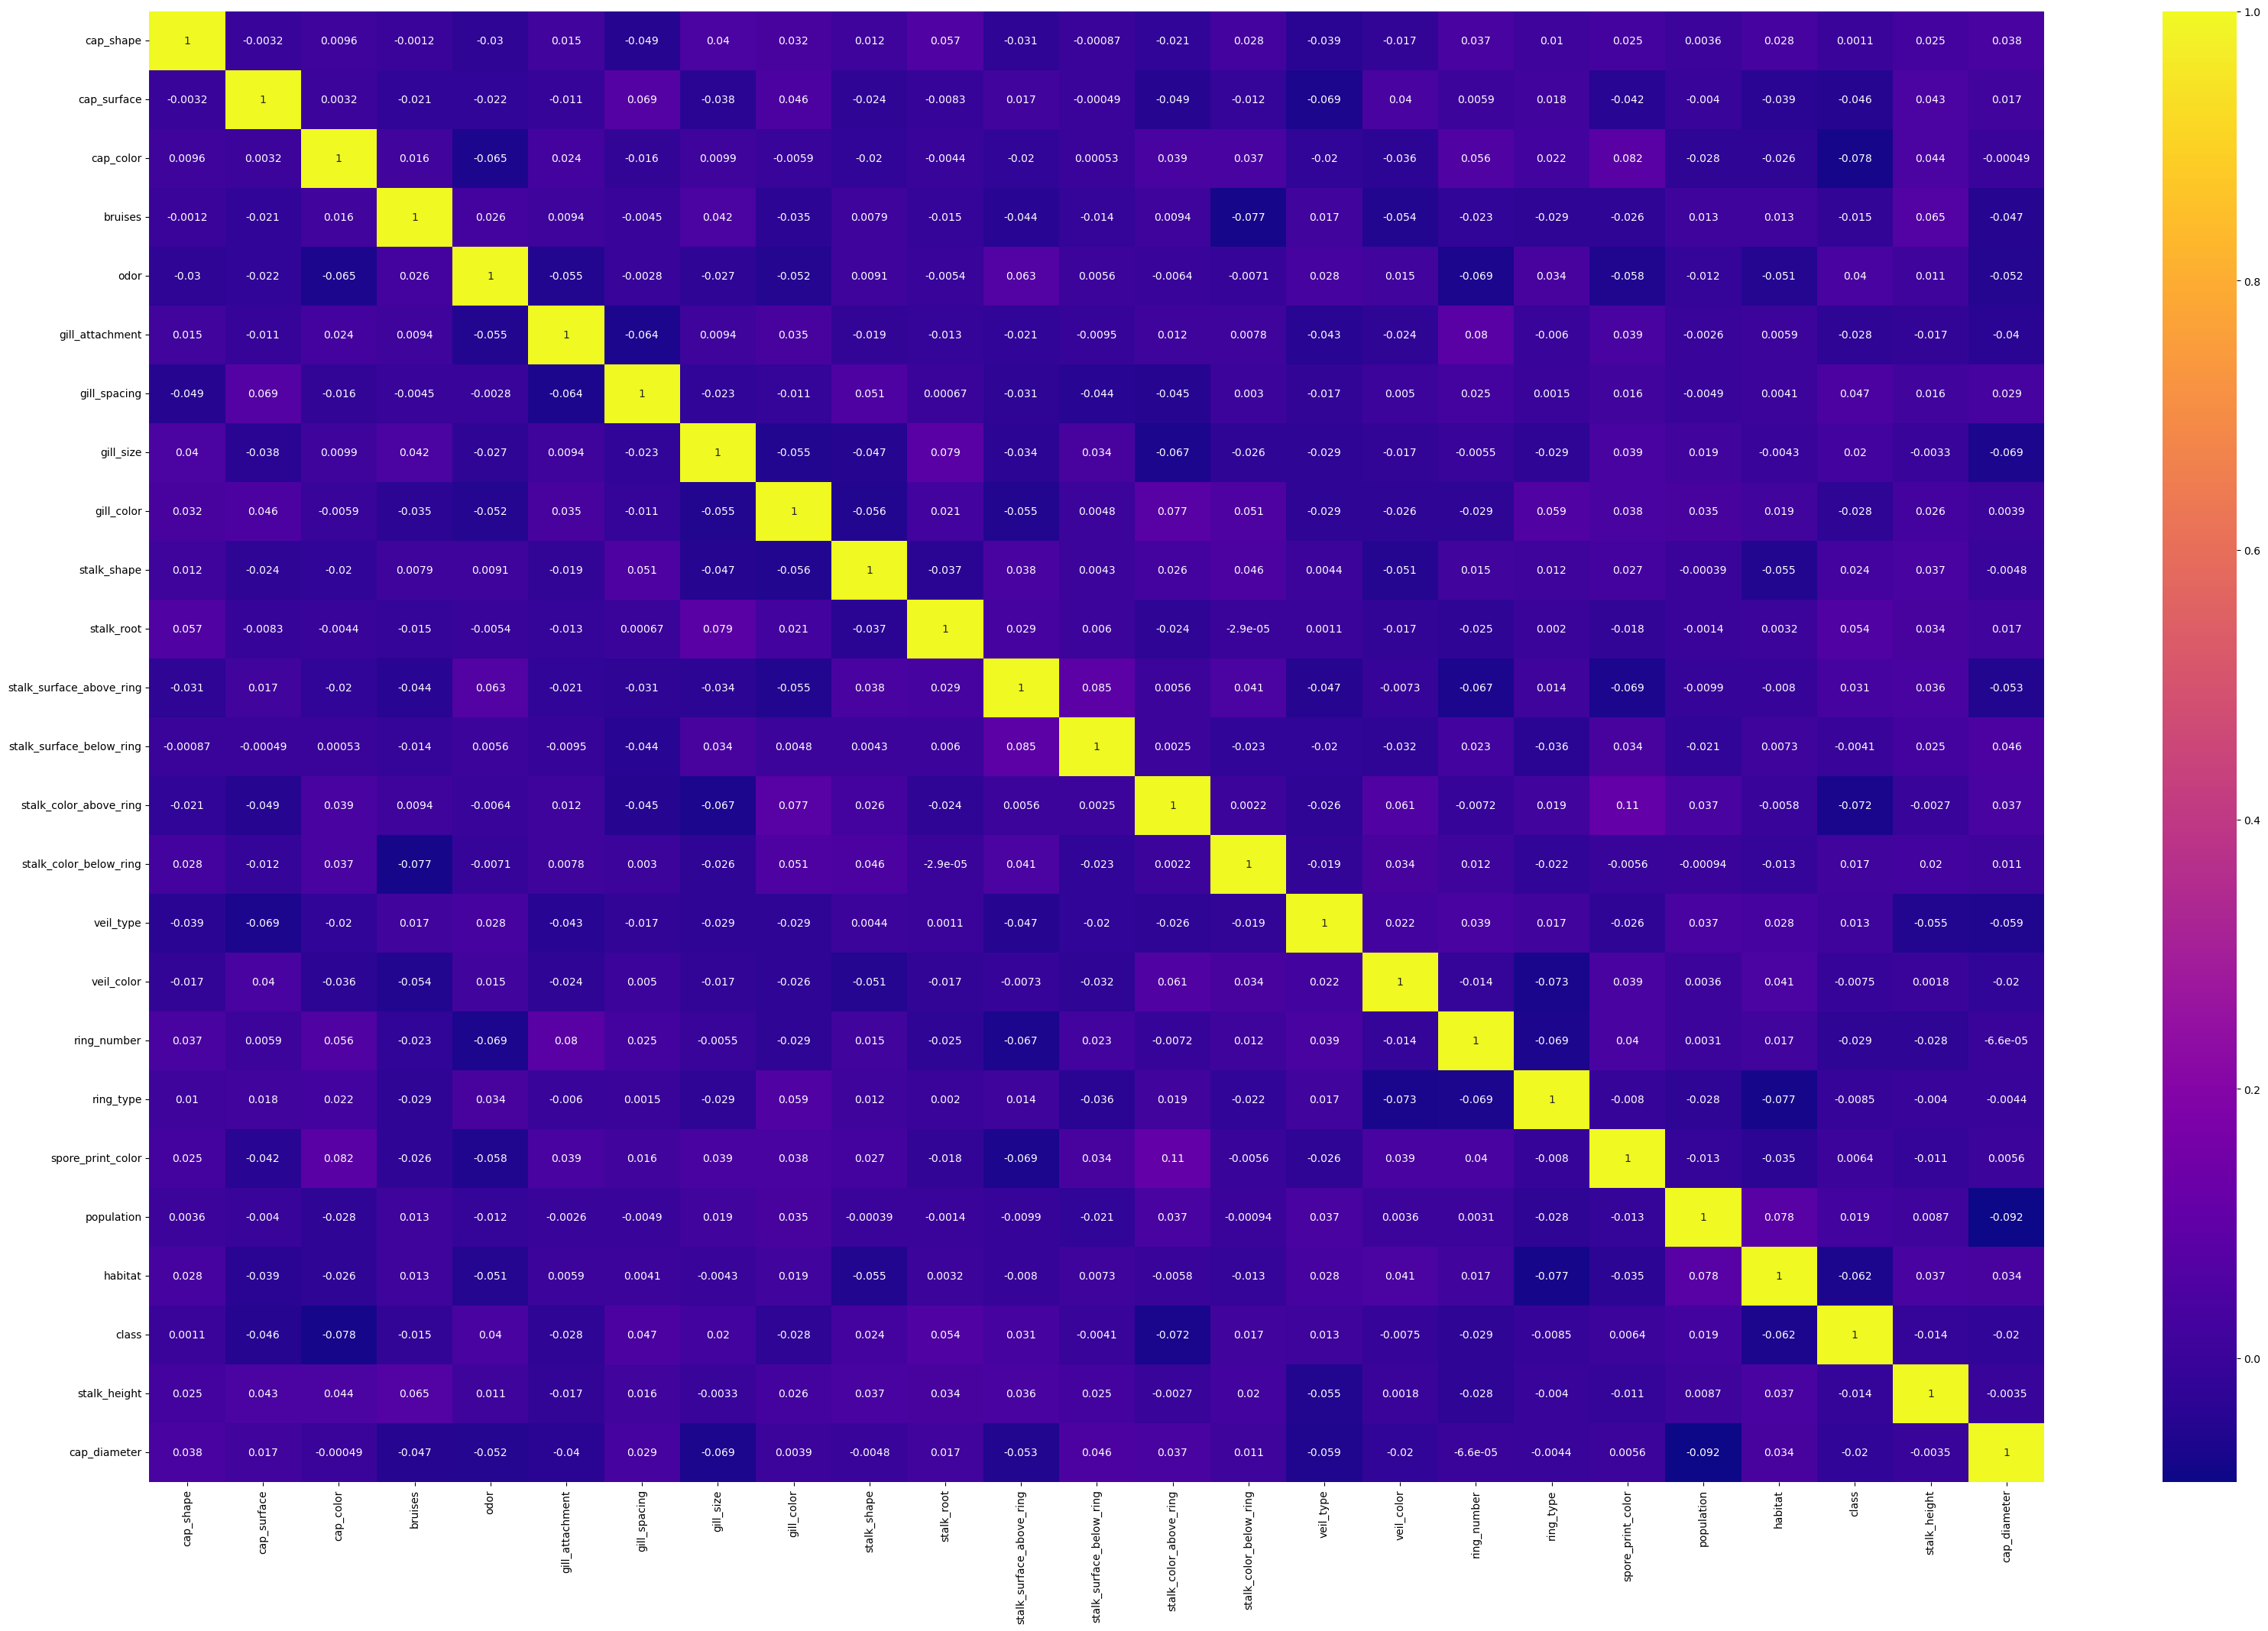

In [12]:
corr=df.corr()
plt.figure(figsize=(40,25))
sns.heatmap(corr,cmap='plasma',annot=True)
plt.show()

In [13]:
feature=df.drop("class",axis=1)
feature

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,8,0,0,2,6,3,1,5,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,0,1,0,2,6,1,2,5,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,3,1,3,2,6,6,0,5,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,5,0,3,2,0,4,1,0,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,7,1,2,0,4,8,1,4,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,4,0,1,1,2,6,0,1,5.877891,17.464145
1996,4,2,5,1,5,0,2,1,9,1,...,4,0,2,1,7,8,2,5,6.500840,13.501957
1997,2,1,3,1,3,3,0,1,7,1,...,6,0,0,2,1,8,0,6,13.558064,11.270020
1998,0,3,7,0,7,2,0,1,6,0,...,5,1,3,1,0,1,5,6,11.092703,8.423199


In [14]:
target=df['class']
target

0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int32

In [15]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.3,random_state=27)

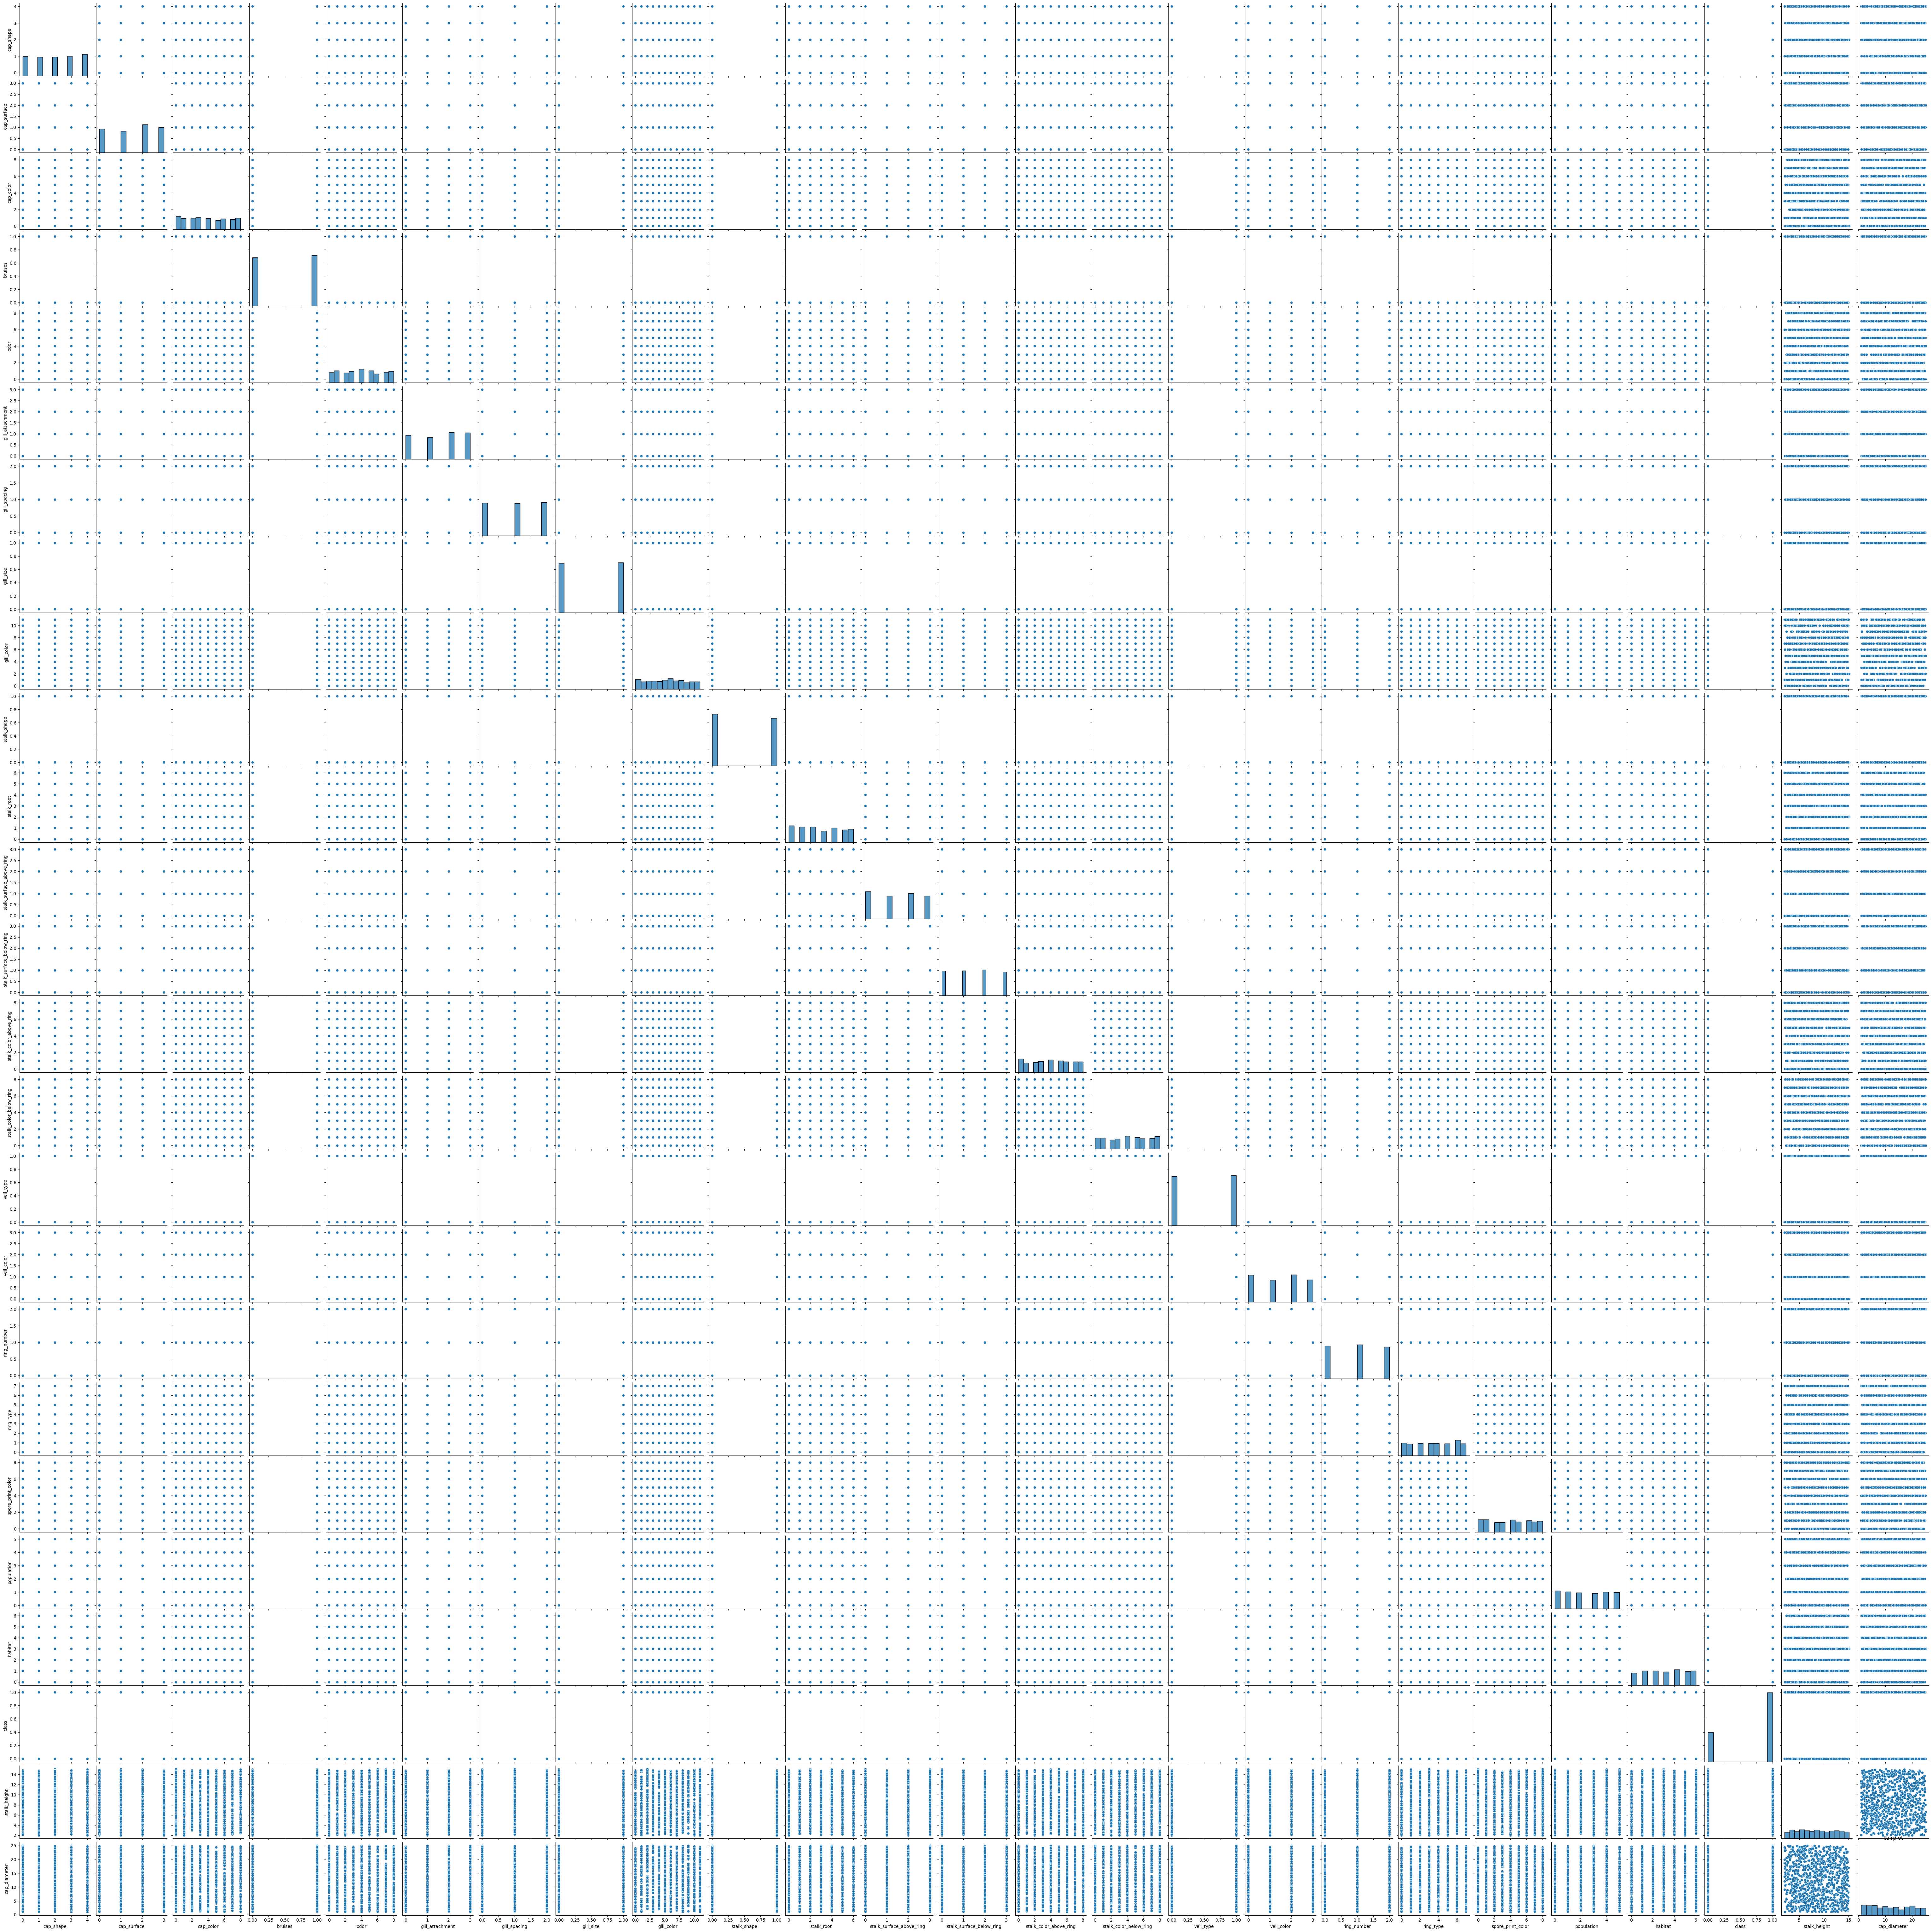

In [16]:
sns.pairplot(df)
plt.title('Pairplot')
plt.show()

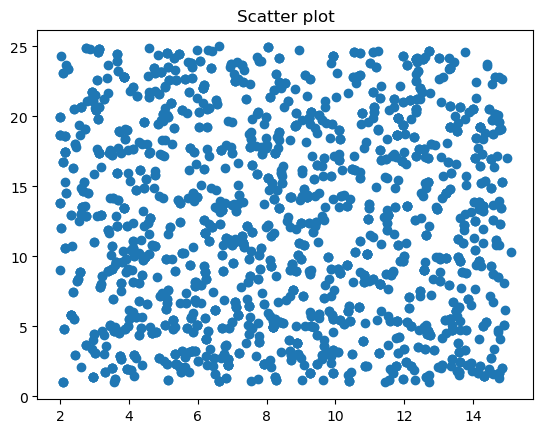

In [17]:
plt.scatter(df['stalk_height'],df['cap_diameter'])
plt.title('Scatter plot')
plt.show()

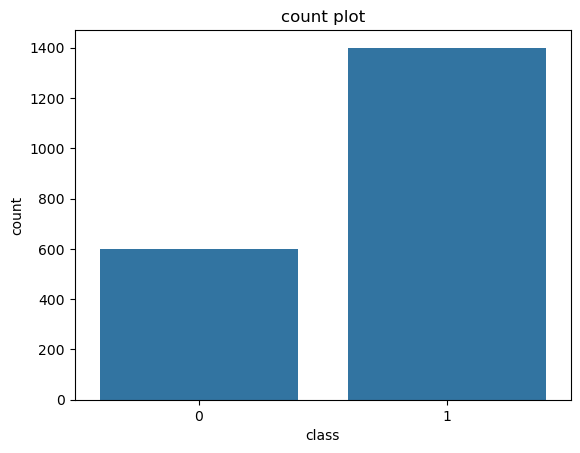

In [18]:
sns.countplot(x='class',data=df)
plt.title("count plot")
plt.show()

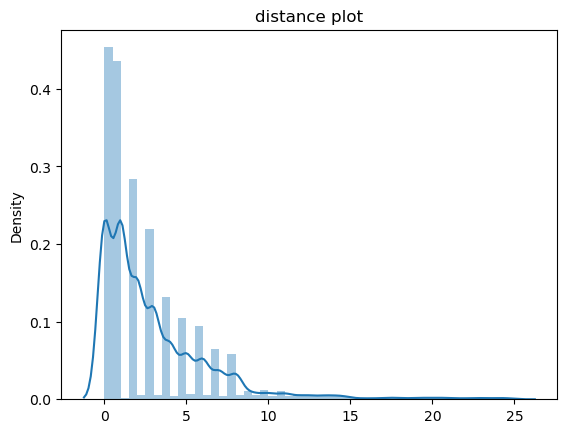

In [19]:
sns.distplot(feature)
plt.title('distance plot')
plt.show()

In [22]:
svm_model=SVC(kernel='linear',C=5)
svm_model.fit(x_train,y_train)

SVC(C=5, kernel='linear')

In [27]:
y_predict=svm_model.predict(x_test)

In [33]:
accuracy_score(y_test,y_predict)*100

70.33333333333334

In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.70      1.00      0.83       422

    accuracy                           0.70       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.49      0.70      0.58       600



In [35]:
f1_score(y_test,y_predict)*100

82.58317025440313

In [37]:
parameters={
    'kernel':['rbf'],
    'gamma':['scale'],
    'C':[0.1,4,5]
}
grid_search=GridSearchCV(estimator=svm_model,param_grid=parameters)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(C=5, kernel='linear'),
             param_grid={'C': [0.1, 4, 5], 'gamma': ['scale'],
                         'kernel': ['rbf']})

In [38]:
grid_search.best_params_

{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}

<Axes: >

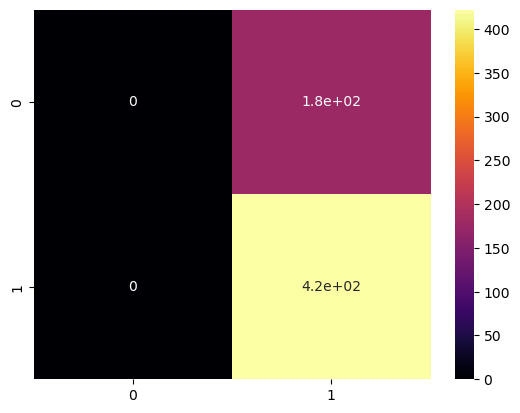

In [41]:
matrix=confusion_matrix(y_test,y_predict)
sns.heatmap(matrix,annot=True,cmap= 'inferno')

### Practical Implacrtions of Support Vector Machine

Support Vector Machines (SVMs) are a powerful class of machine learning algorithms renowned for their effectiveness in classification tasks.

Key Strengths:

High-Dimensional Data: SVMs excel in scenarios with numerous features, a common occurrence in fields like text analysis and bioinformatics.
Non-Linear Relationships: Through the use of kernels, SVMs can effectively model intricate, non-linear patterns in data. This is crucial in applications where simple linear boundaries are insufficient, such as medical image analysis.
Robust Generalization: SVMs are less prone to overfitting, a significant advantage when dealing with limited datasets. By focusing on maximizing the margin between classes, they prioritize generalization and avoid overly complex models.
Real-World Applications:

SVMs find widespread application in various domains:

Image Recognition: Object detection, face recognition, and image classification tasks.
Fraud Detection: Identifying suspicious patterns in financial transactions.
Bioinformatics: Protein classification, gene prediction, and drug discovery.
Text Classification: Sentiment analysis, spam detection, and topic categorization.